In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
df1=pd.read_csv("Dataset/Fake.csv")
df2=pd.read_csv("Dataset/True.csv")

## Lets check DataFrame1

In [3]:
df1

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [4]:
df1.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
df1['Category']=0

In [7]:
df1

,title,text,subject,date,Category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [8]:
df1['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [9]:
df1.columns

Index(['title', 'text', 'subject', 'date', 'Category'], dtype='object')

In [10]:
df1.shape

(23481, 5)

<Axes: xlabel='count', ylabel='subject'>

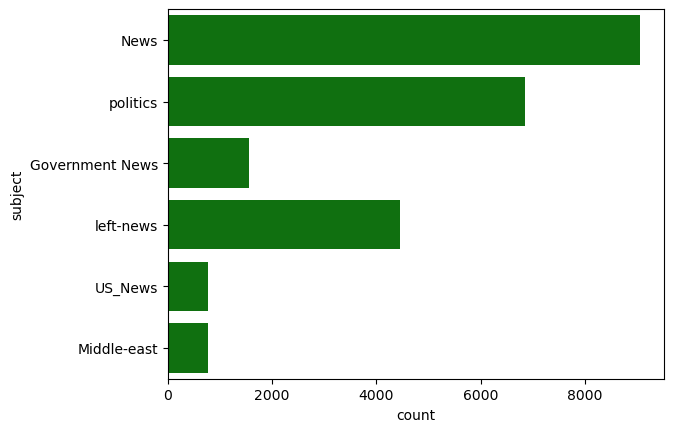

In [11]:
sns.countplot(df1['subject'],color='g',)

## Lets Check DataFrame2

In [12]:
df2.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [14]:
df2.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [15]:
df2['Category']=1

In [16]:
df2

,title,text,subject,date,Category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


<Axes: xlabel='count', ylabel='subject'>

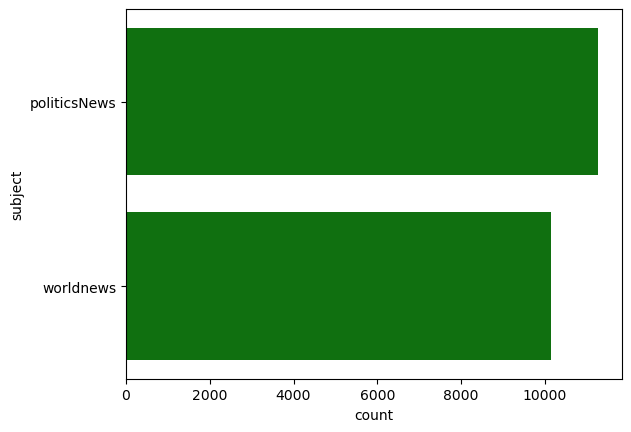

In [17]:
sns.countplot(df2['subject'],color='g',)

## Merge 2 DataFrame

In [18]:
df=pd.concat([df1,df2],axis=0)

In [19]:
df

,title,text,subject,date,Category
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [20]:
# Shuffling the concatenated DataFrame
df_shuffled = df.sample(frac=1).reset_index(drop=True)

print(df_shuffled)

                                                   title  \
0      In Bolivia's bellwether city, anger at Morales...   
1      Lawsuit against Trump model agency dismissed b...   
2      Maine official approves ballot initiative on m...   
3      HERE’S HOW HILLARY’S VP PICK Has Just Proven H...   
4       Trumpcare Is Officially Dead, Senator Collins...   
...                                                  ...   
44893  BREAKING UNDERCOVER VIDEO: Democrat Operative…...   
44894  U.S. judge in California blocks Trump's order ...   
44895  Second day of jury deliberation for Turkish ba...   
44896  France's Le Pen congratulates German far-right...   
44897  Pence says working with allies to put pressure...   

                                                    text          subject  \
0      EL ALTO, Bolivia (Reuters) - In El Alto, a for...        worldnews   
1       (This story corrects date of election to Nov....     politicsNews   
2      (Reuters) - A Maine state official on Wed

In [21]:
df_shuffled

,title,text,subject,date,Category
0,"In Bolivia's bellwether city, anger at Morales...","EL ALTO, Bolivia (Reuters) - In El Alto, a for...",worldnews,"December 19, 2017",1
1,Lawsuit against Trump model agency dismissed b...,(This story corrects date of election to Nov....,politicsNews,"March 24, 2016",1
2,Maine official approves ballot initiative on m...,(Reuters) - A Maine state official on Wednesda...,politicsNews,"April 27, 2016",1
3,HERE’S HOW HILLARY’S VP PICK Has Just Proven H...,Hillary s VP pick is proving himself to be a a...,Government News,"Jul 26, 2016",0
4,"Trumpcare Is Officially Dead, Senator Collins...","Graham-Cassidy, the latest and worst in a line...",News,"September 26, 2017",0
...,...,...,...,...,...
44893,BREAKING UNDERCOVER VIDEO: Democrat Operative…...,"Graphic, uncensored and disturbing is how Jam...",politics,"Oct 17, 2016",0
44894,U.S. judge in California blocks Trump's order ...,(Reuters) - A federal court judge in Californi...,politicsNews,"November 21, 2017",1
44895,Second day of jury deliberation for Turkish ba...,NEW YORK (Reuters) - A New York jury on Thursd...,worldnews,"December 21, 2017",1
44896,France's Le Pen congratulates German far-right...,PARIS (Reuters) - French far-right leader Mari...,worldnews,"September 24, 2017",1


In [22]:
df['Category'].value_counts()

0    23481
1    21417
Name: Category, dtype: int64

Text(0.5, 0, 'Category 1=Not fake  0=Fake')

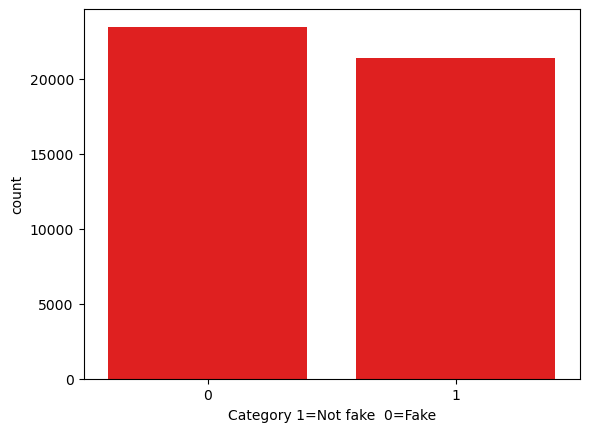

In [23]:
sns.countplot(x=df['Category'],color='red',legend='auto')
plt.xlabel("Category 1=Not fake  0=Fake")

In [24]:
df=df[['text','Category']]

In [25]:
df

,text,Category
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
21413,"LONDON (Reuters) - LexisNexis, a provider of l...",1
21414,MINSK (Reuters) - In the shadow of disused Sov...,1
21415,MOSCOW (Reuters) - Vatican Secretary of State ...,1


## Data Cleaning & preprocessing

In [26]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [27]:
df['text'] = df['text'].apply(lambda x: cleanResume(x))

C:\Users\Kumar Aditya\AppData\Local\Temp\ipykernel_10632\3375450472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: cleanResume(x))


In [28]:
df

,text,Category
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,On Friday it was revealed that former Milwauke...,0
3,On Christmas day Donald Trump announced that h...,0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
21412,BRUSSELS Reuters NATO allies on Tuesday welcom...,1
21413,LONDON Reuters LexisNexis a provider of legal ...,1
21414,MINSK Reuters In the shadow of disused Soviet ...,1
21415,MOSCOW Reuters Vatican Secretary of State Card...,1


In [29]:
df['text'][0]

0    Donald Trump just couldn t wish all Americans ...
0    WASHINGTON Reuters The head of a conservative ...
Name: text, dtype: object

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['text'])
requredTaxt  = tfidf.transform(df['text'])

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(requredTaxt, df['Category'], test_size=0.2, random_state=42)

## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [34]:
pred_lr=LR.predict(X_test)

In [35]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.98      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [36]:
accuracy_score(pred_lr,y_test)

0.9860801781737194

## Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
pred_dt = DT.predict(X_test)

In [39]:
accuracy_score(pred_dt,y_test)

0.9956570155902005

In [40]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4733
           1       0.99      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



## Random Forest 

In [63]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [65]:
pred_rfc = RFC.predict(X_test)

In [67]:
RFC.score(X_test, y_test)

0.9902004454342984

In [68]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4733
           1       0.99      0.99      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [46]:
import pickle
pickle.dump(tfidf,open('Models/tfidf.pkl','wb'))
pickle.dump(DT, open('Models/DT.pkl', 'wb'))
pickle.dump(LR, open('Models/LogisticRegression.pkl', 'wb'))

In [42]:
news="""
21st Century Wire says As 21WIRE reported earlier this week, the unlikely  mishap  of two US Naval vessels straying into Iranian waters   just hours before the President s State of the Union speech, followed by the usual parade of arch-neocons coming on TV in real time to declare the incident as  an act of aggression  by Iran against the United States   is no mere coincidence.24 hours after the incident, the Iranians returned all 11 US sailors, unharmed and in good spirits. The only remaining casualty from this event was an incident of a common condition in Washington known as  Pre-Traumatic Stress Disorder    suffered by a certain US Senator was mortified by the uneventful outcome which followed Daniel McAdams Ron Paul Institute  The two US Navy riverine command boats intercepted in Iranian territorial waters yesterday were sent on their way along with the crew of 10 US sailors after brief detention on Iranian soil.According to news reports, the well-armed warships either suffered mechanical or navigational difficulties which caused them to enter Iranian territory (although it may well have been a game of cat-and-mouse to test the Iranian response). The US sailors were apparently treated well, enjoyed what appeared a decent meal in relaxed surroundings, and in the end apologized for the mistake and praised their treatment by the Iranians. Thanks to President Obama s policy shift on Iran toward engagement and away from isolationism, Secretary of State John Kerry was able to telephone his Iranian counterpart Mohammad Zarif and quickly defuse what just months ago would have been a far more serious situation.This should be a good-news story about the value of diplomacy and reducing tensions with adversaries, but Sen. John McCain (R-AZ) was having none of it. That Kerry expressed his appreciation to the Iranians for swiftly releasing the American sailors only showed the Obama Administration s  craven desire to preserve the dangerous Iranian nuclear deal at all costs evidently knows no limit,  said McCain in a press release.McCain was furious that  Obama administration officials seem to be falling over themselves to offer praise for Iran s graciousness  and was outraged that the Iranians dared interfere with the actions of US military vessels operating in Iranian waters.In the world of John McCain, only the United States has the right to national sovereignty. The US military has the right to act anywhere and everywhere and the rest of the world dare not raise a question.According to McCain,  sovereign immune naval vessels are exempt from detention, boarding, or search. Their crews are not subject to detention or arrest. Imagine the tune McCain would have been singing if a well-armed Iranian naval vessel had been spotted in US territorial waters off the coast of New York. Would he have so rigorously condemned any US interference in the actions of Iran s sovereign naval vessels?Leave it to some clever Twitterers to post an example of the difference between US and Iranian detention.Copyright   2016 by RonPaul Institute. Permission to reprint in whole or in part is gladly granted, provided full credit and a live link are given.READ MORE JOHN MCCAIN NEWS AT: 21st Century Wire McPain Files
"""

In [45]:
import pickle

# Load the trained classifier
clf = pickle.load(open('Models/DT.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleanResume(news)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]





print(prediction_id)


0


Name: scikit-learn
Version: 1.2.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\Kumar Aditya\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
Note: you may need to restart the kernel to use updated packages.
